In [1]:
# Import necesarry packages
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# Load the .csv dataset
df= pd.read_csv('COVID clinical trials.csv')

# View the imported dataset
print (df.head(5))
print (df.shape)
print (df.columns)

   Rank   NCT Number                                              Title  \
0     1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1     2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2     3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3     4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4     5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   

        Acronym                  Status         Study Results  \
0   COVID-IDNow  Active, not recruiting  No Results Available   
1      COVID-19      Not yet recruiting  No Results Available   
2   TAC-COVID19              Recruiting  No Results Available   
3      COVID-19  Active, not recruiting  No Results Available   
4  TMF-COVID-19              Recruiting  No Results Available   

                                          Conditions  \
0                                            Covid19   
1                               SARS-CoV-2 Inf

In [3]:
# Basic info about the dataset
print (df.info())

# Check for missing values
missing_values= df.isnull().sum()
print ("\nTotal missing values:\n",missing_values)

# Filling the missing data
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('Unknown')
    else:
        df[col] = df[col].fillna(-1)

# Check for duplicate rows
duplicates= df.duplicated().sum()
print("\nTotal Duplicates:",duplicates)

# Drop metadata columns unlikely to be useful in summary analysis
df= df.drop (columns=['Rank', 'Other IDs', 'URL', 'Study Documents', 'Results First Posted'])

print (df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [4]:
# Save cleaned version
df.to_csv('Covid-19_cleaned_dataset.csv', index=False)
df.shape

(5783, 22)

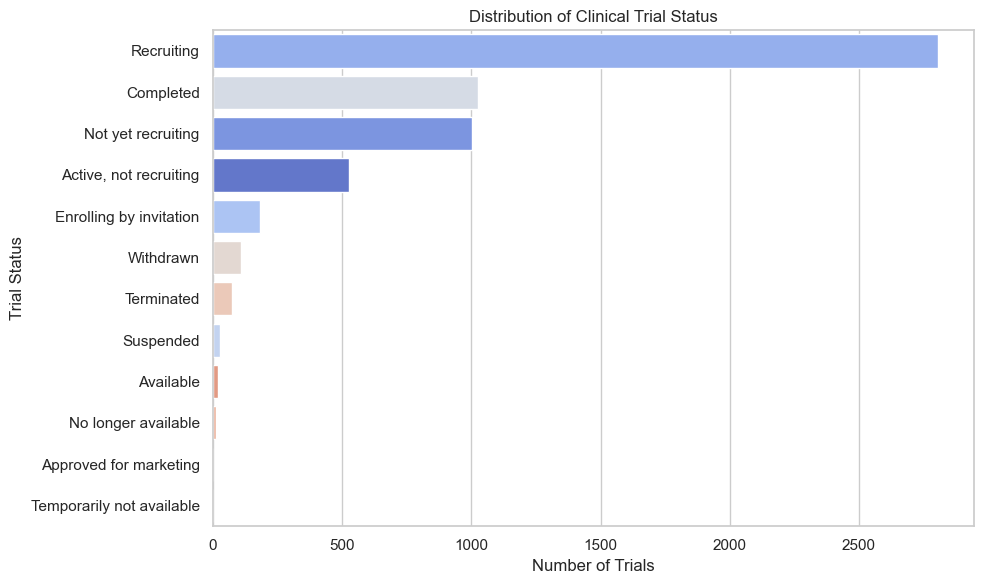

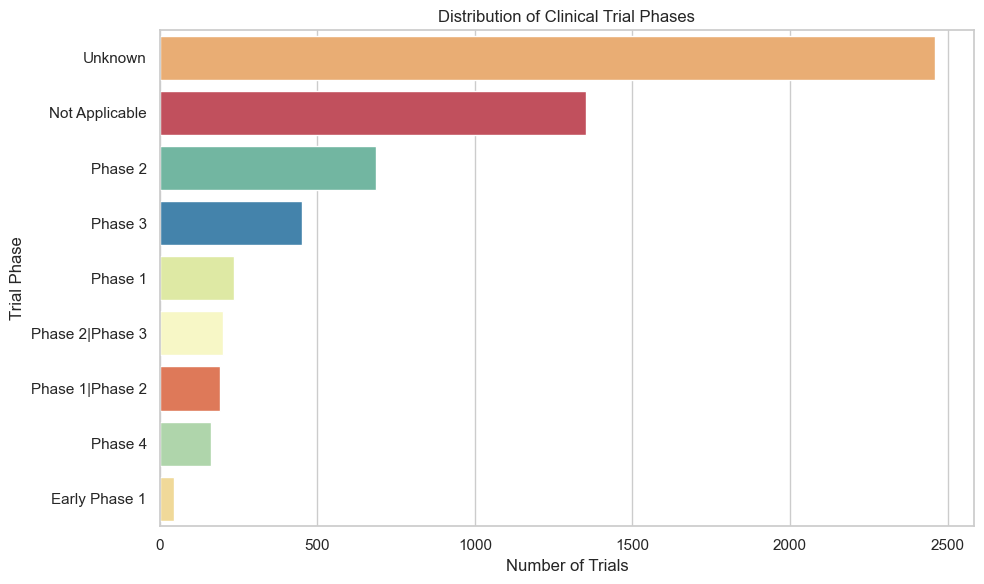

C:\Users\NAILA\AppData\Local\Temp\ipykernel_16216\2651539357.py:41: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


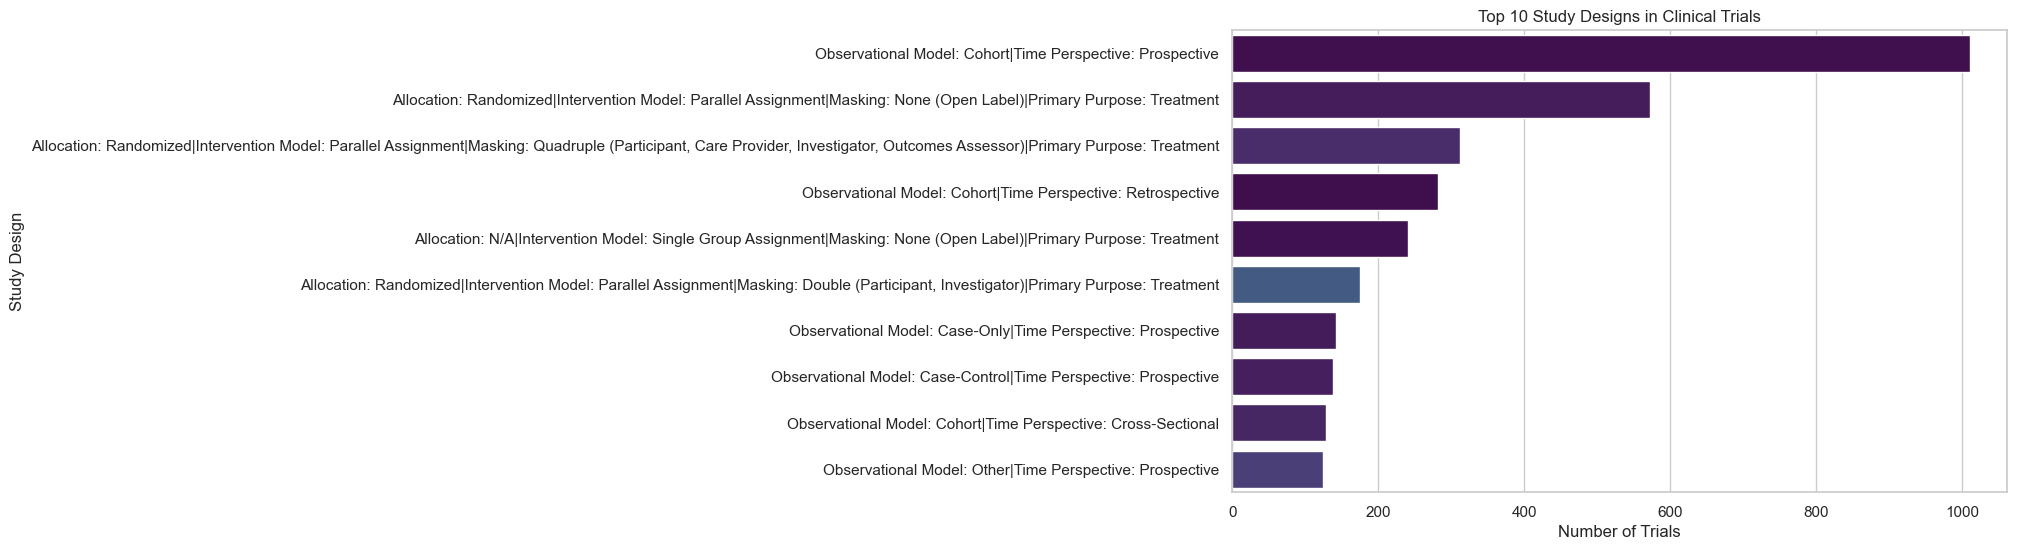

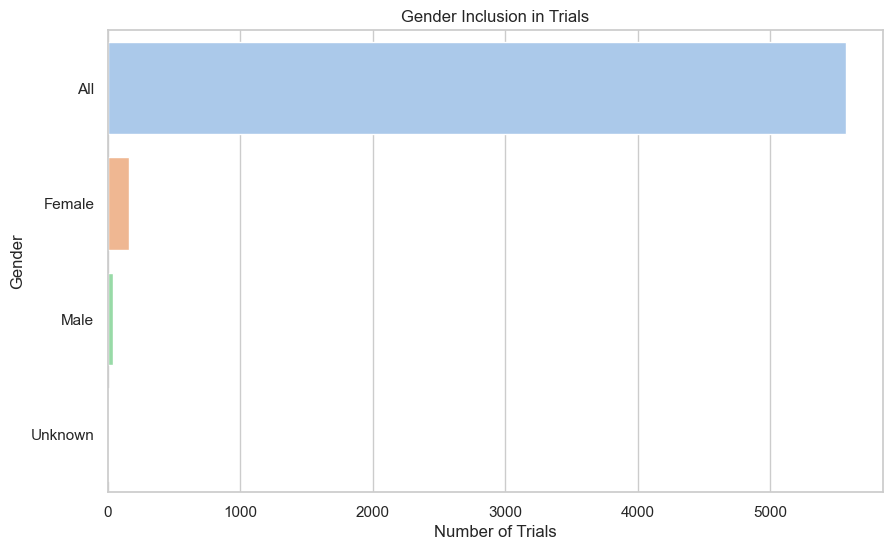

In [5]:
### Exploratory Data Analysis
## Univariate Analysis

# Set the theme
sns.set(style="whitegrid", palette="Set2")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Trial Status
plt.figure()
sns.countplot(data=df, y='Status', hue='Status', order=df['Status'].value_counts().index, 
              palette="coolwarm", legend=False)
plt.title('Distribution of Clinical Trial Status')
plt.xlabel('Number of Trials')
plt.ylabel('Trial Status')
plt.tight_layout()

# Save and show the plot
plt.savefig('visuals/distribution of clinical trial status')
plt.show()

# 2. Clinical Phases
plt.figure()
sns.countplot(data=df, y='Phases', hue='Phases', order=df['Phases'].value_counts().index, 
              palette="Spectral", legend=False)
plt.title('Distribution of Clinical Trial Phases')
plt.xlabel('Number of Trials')
plt.ylabel('Trial Phase')
plt.tight_layout()

# Save and show the plot
plt.savefig('visuals/distribution of clinical trial phases')
plt.show()

# 3. Study Designs
plt.figure()
sns.countplot(data=df, y='Study Designs', hue='Study Designs', order=df['Study Designs'].value_counts().index[:10], 
              palette="viridis", legend=False)
plt.title('Top 10 Study Designs in Clinical Trials')
plt.xlabel('Number of Trials')
plt.ylabel('Study Design')
plt.tight_layout()

# Save and show the plot
plt.savefig('visuals/top designs in clinical trials')
plt.show()

# 4. Gender Inclusion
plt.figure()
sns.countplot(data=df, y='Gender', hue='Gender', order=df['Gender'].value_counts().index, 
              palette="pastel", legend=False)
plt.title('Gender Inclusion in Trials')
plt.xlabel('Number of Trials')
plt.ylabel('Gender')
#plt.tight_layout()

# Save and show the plot
plt.savefig('visuals/gender inclusion in trials')
plt.show()

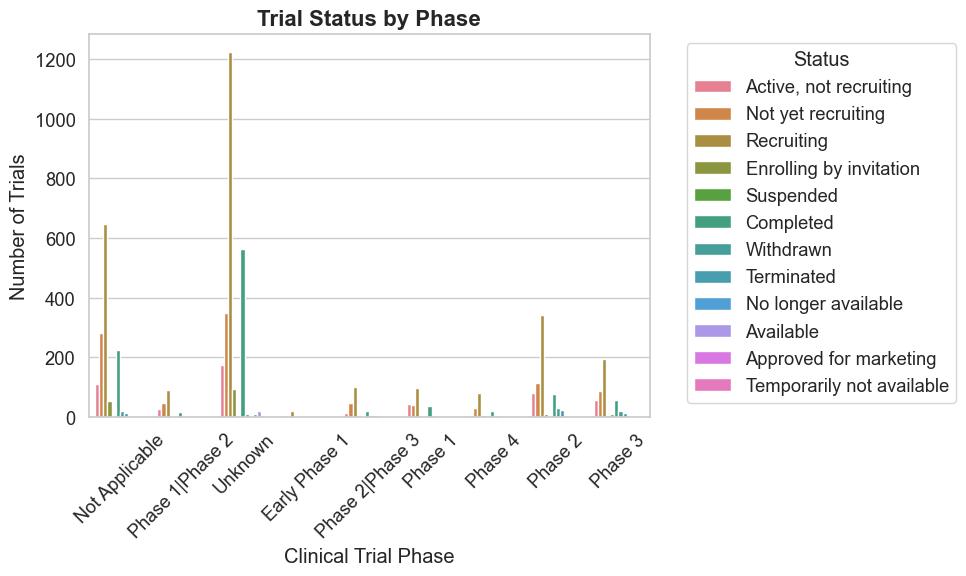

C:\Users\NAILA\AppData\Local\Temp\ipykernel_16216\517581132.py:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


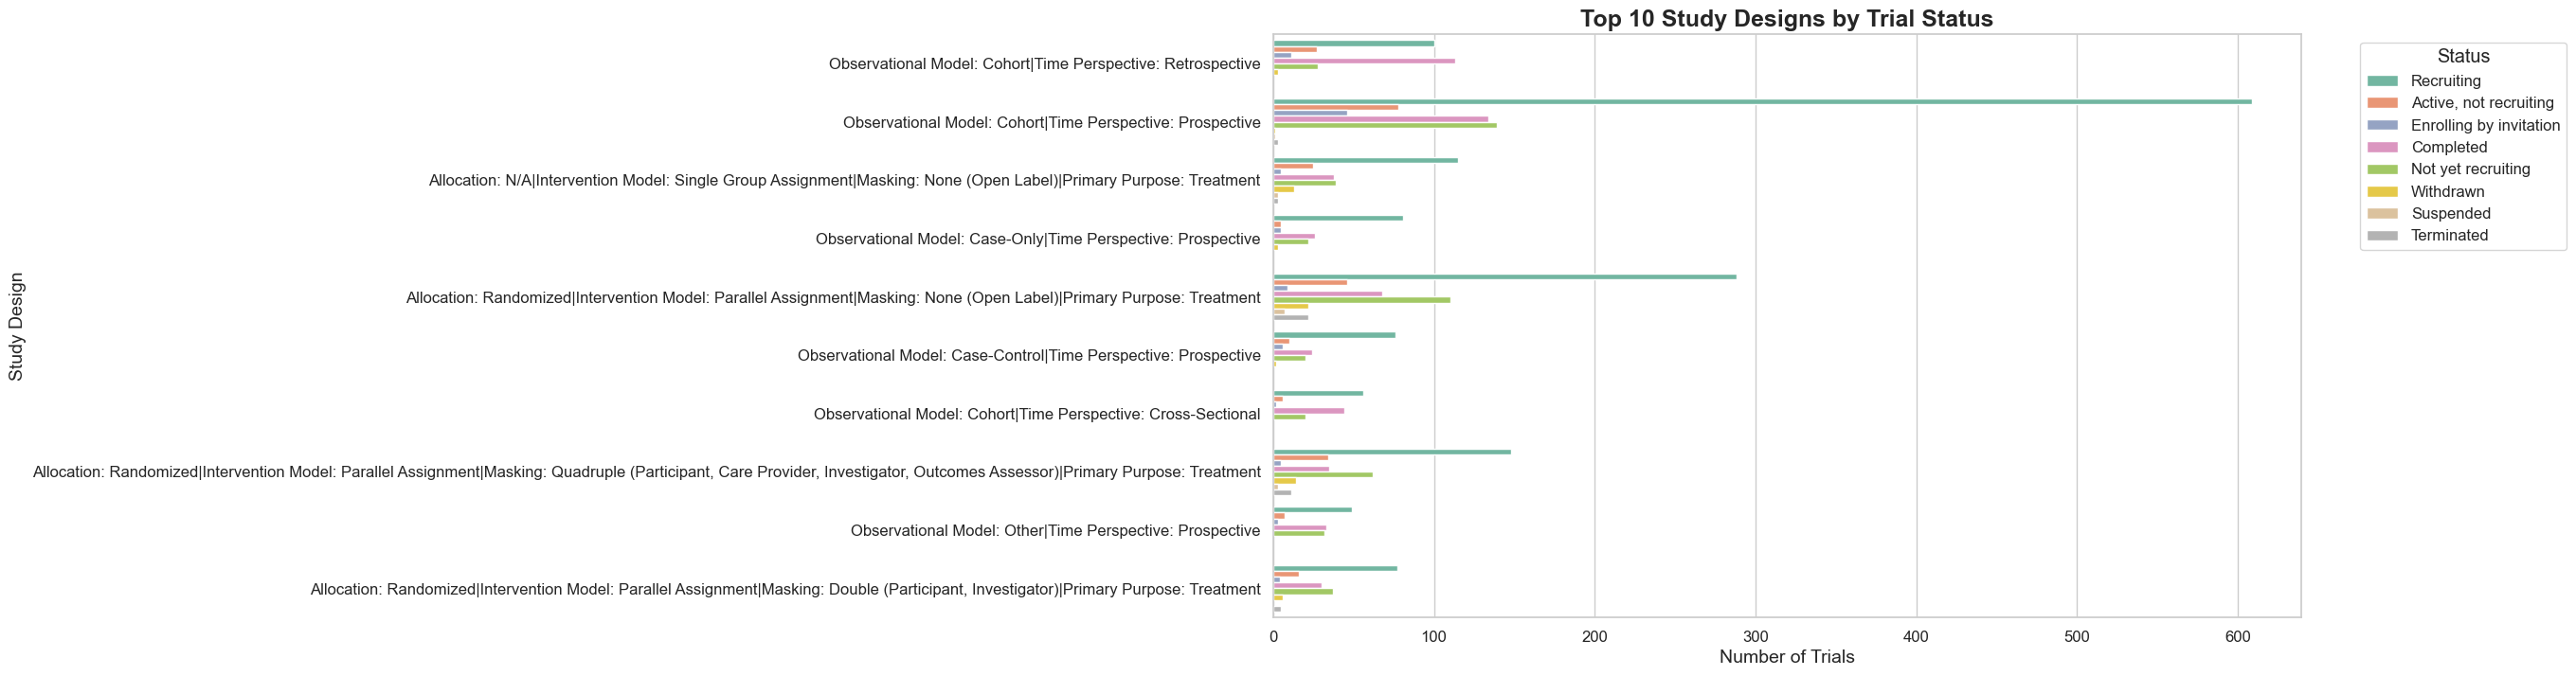

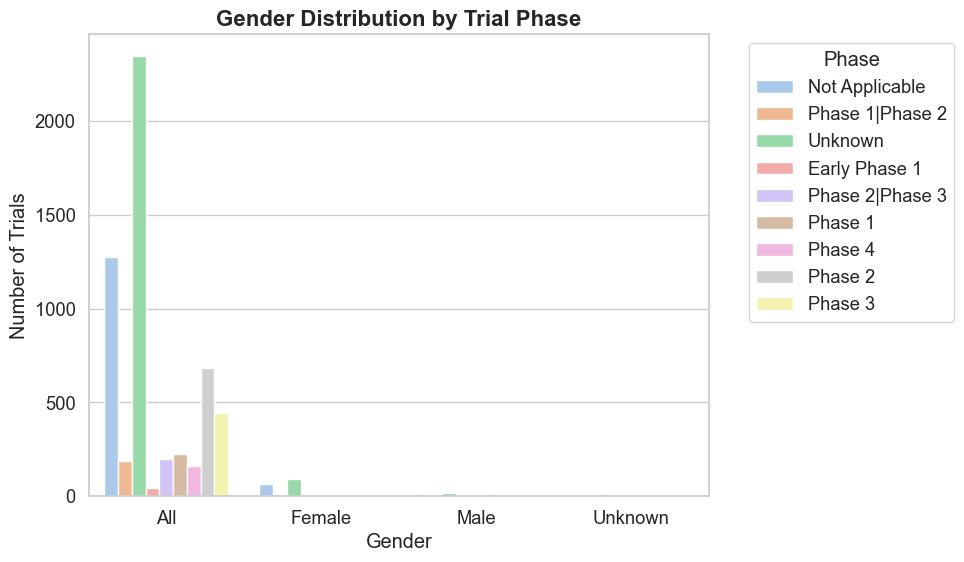

In [6]:
## Bivariate Analysis

# Set the theme
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# 1. Trial Status vs Phase
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Phases', hue='Status')
plt.title("Trial Status by Phase", fontsize=16, weight='bold')
plt.xlabel("Clinical Trial Phase")
plt.ylabel("Number of Trials")
plt.xticks(rotation=45)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save and show the plot
plt.savefig('visuals/trial status vs phase')
plt.show()

# 2. Study Design vs Status
# Top 10 most common study designs for cleaner plot
top_studies = df['Study Designs'].value_counts().nlargest(10).index
df_top = df[df['Study Designs'].isin(top_studies)]

plt.figure(figsize=(14, 8))
sns.countplot(data=df_top, y='Study Designs', hue='Status', palette='Set2')
plt.title("Top 10 Study Designs by Trial Status", fontsize=18, weight='bold')
plt.xlabel("Number of Trials", fontsize=14)
plt.ylabel("Study Design", fontsize=14)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save and show the plot
plt.savefig('visuals/study design vs status')
plt.show()

# 3. Gender vs Phase
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Phases')
plt.title("Gender Distribution by Trial Phase", fontsize=16, weight='bold')
plt.xlabel("Gender")
plt.ylabel("Number of Trials")
plt.legend(title='Phase', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save and show the plot
plt.savefig('visuals/gender vs phase')
plt.show()

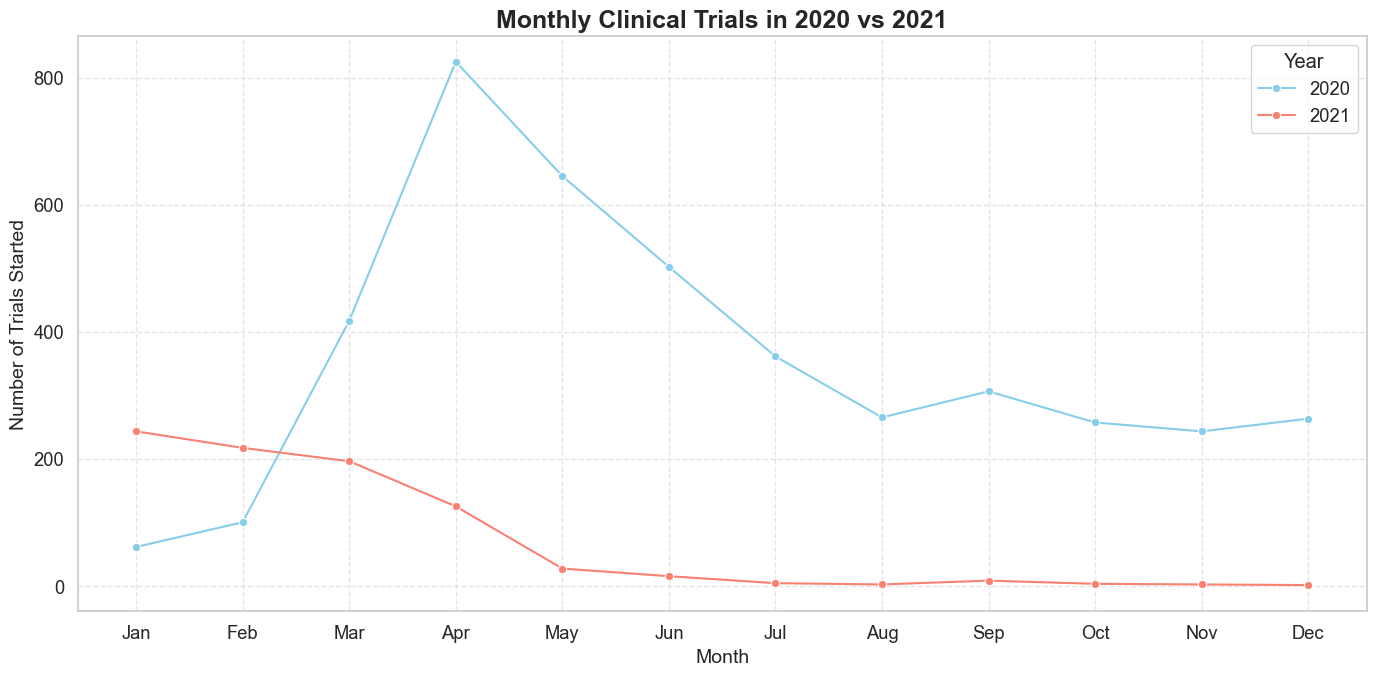

In [7]:
# 'Start Date' is datetime
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')

# Filter for 2020 and 2021
df_2020 = df[df['Start Date'].dt.year == 2020]
df_2021 = df[df['Start Date'].dt.year == 2021]

# Group by month (1-12) and count trials
monthly_2020 = df_2020['Start Date'].dt.month.value_counts().sort_index()
monthly_2021 = df_2021['Start Date'].dt.month.value_counts().sort_index()

# Create DataFrame for plotting
months = range(1, 13)
monthly_df = pd.DataFrame({
    'Month': months,
    '2020': [monthly_2020.get(m, 0) for m in months],
    '2021': [monthly_2021.get(m, 0) for m in months]
})

# Plot
plt.figure(figsize=(14,7))
sns.lineplot(x='Month', y='2020', data=monthly_df, marker='o', label='2020', color='skyblue')
sns.lineplot(x='Month', y='2021', data=monthly_df, marker='o', label='2021', color='salmon')
plt.title('Monthly Clinical Trials in 2020 vs 2021', fontsize=18, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Trials Started', fontsize=14)
plt.xticks(ticks=months, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Save and show the plot
plt.savefig('visuals/Monthly clinical trials time-series')
plt.show()

C:\Users\NAILA\AppData\Local\Temp\ipykernel_16216\2902018004.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_counts.index, x=country_counts.values, palette='viridis', legend=False)


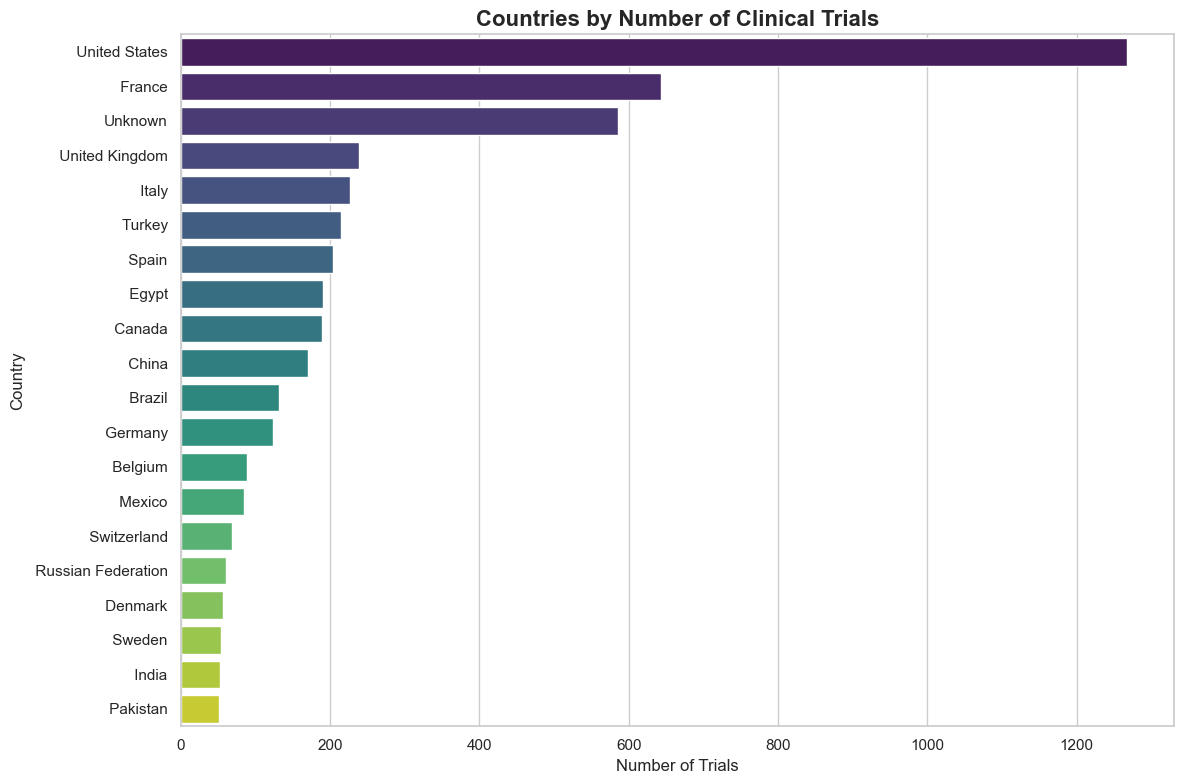

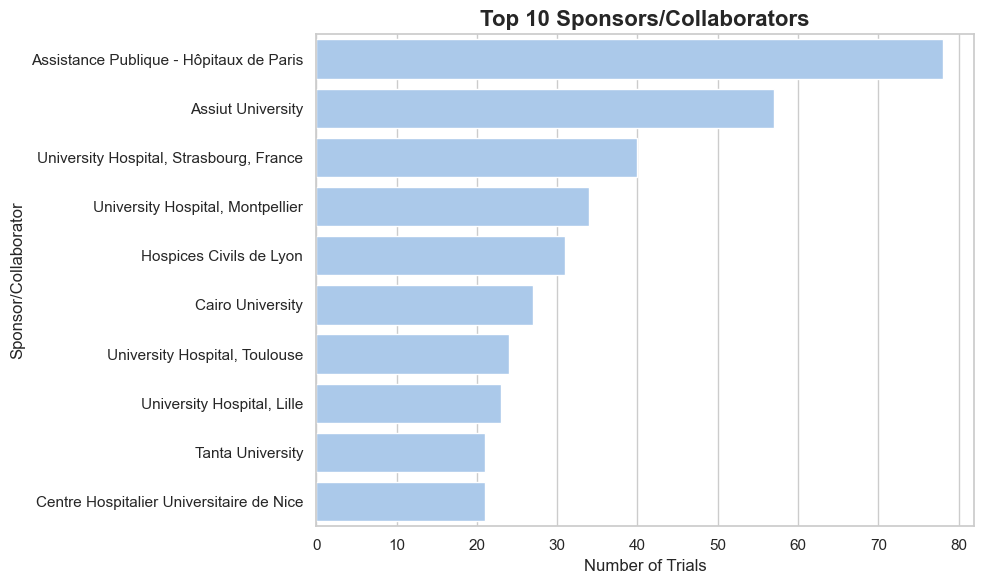

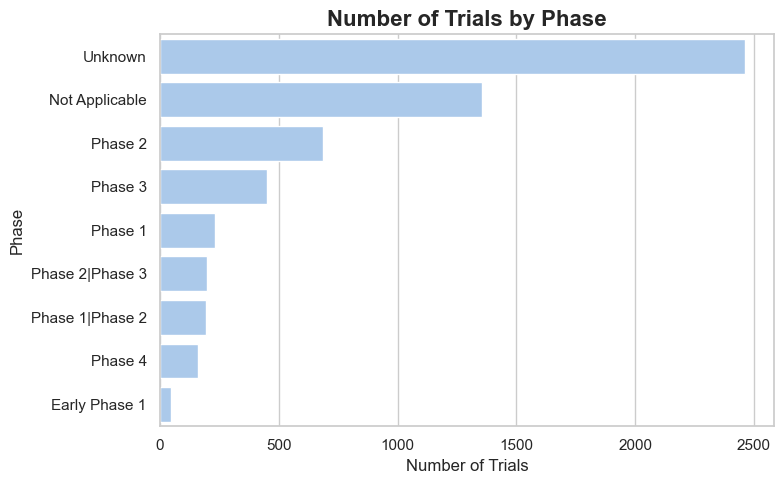

C:\Users\NAILA\AppData\Local\Temp\ipykernel_16216\2902018004.py:68: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


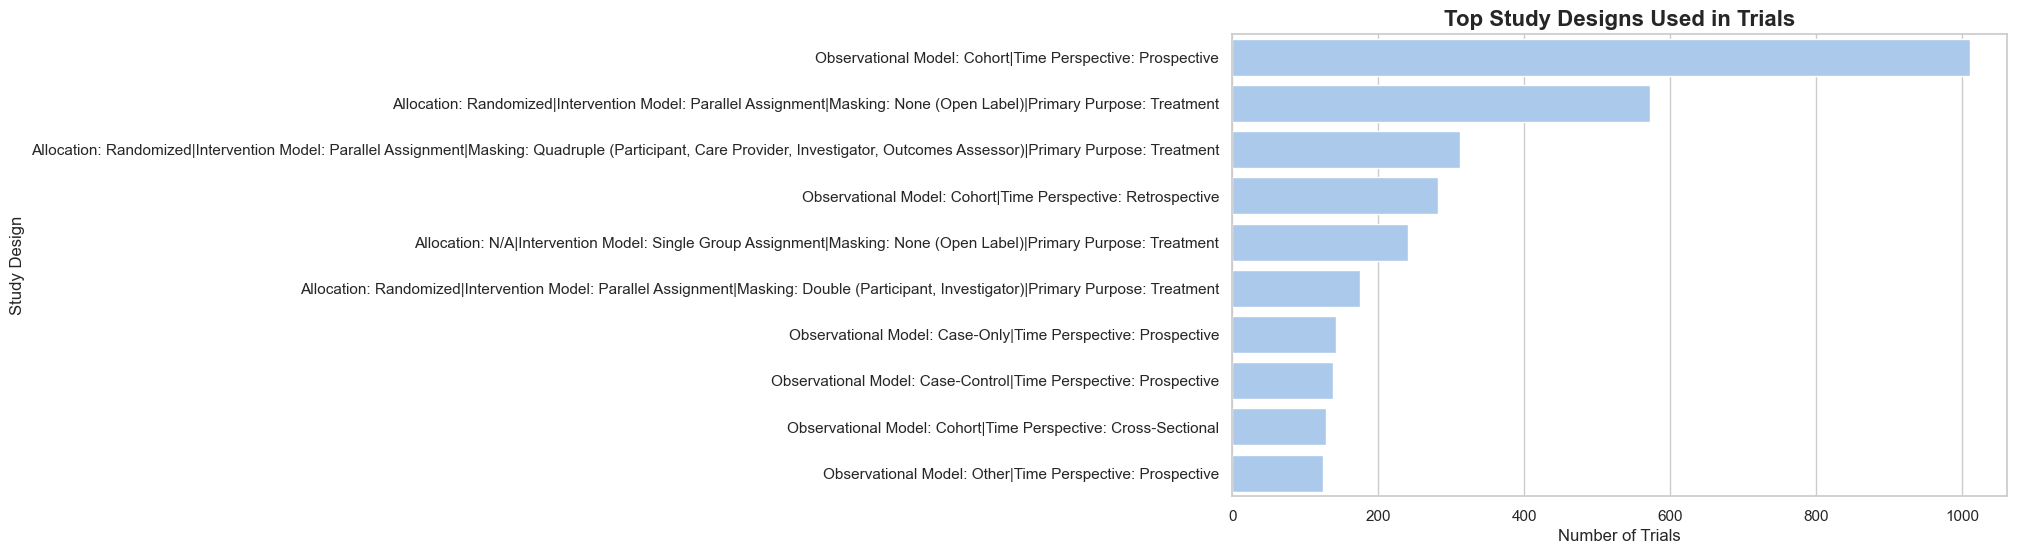

In [8]:
# Set general aesthetic style
sns.set(style="whitegrid", palette="pastel")

# --------------------------
# 1. Top 10 Countries by Trial Count
# --------------------------
# Step 1: Replace NaN with 'Unknown'
df['Country'] = df['Locations'].fillna('Unknown')

# Step 2: Apply inline logic to extract countries from the string
df['Country'] = df['Country'].apply(lambda x: ', '.join(sorted(set(
    [place.strip().split(',')[-1] for place in x.split('|')]
    ))) if x != 'Unknown' else 'Unknown'
)

# Plot
country_counts = df['Country'].value_counts().head(20)
plt.figure(figsize=(12, 8))
sns.barplot(y=country_counts.index, x=country_counts.values, palette='viridis', legend=False)
plt.title('Countries by Number of Clinical Trials', fontsize=16, weight='bold')
plt.xlabel('Number of Trials')
plt.ylabel('Country')
plt.tight_layout()

# Save and show the plot
plt.savefig('visuals/countries_by_trial_count.png')
plt.show()

# --------------------------
# 2. Top 10 Sponsors
# --------------------------
top_sponsors = df['Sponsor/Collaborators'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_sponsors.values, y=top_sponsors.index)
plt.title('Top 10 Sponsors/Collaborators', fontsize=16, weight='bold')
plt.xlabel('Number of Trials')
plt.ylabel('Sponsor/Collaborator')
plt.tight_layout()


plt.savefig('visuals/top_10_sponsors.png')
plt.show()

# --------------------------
# 3. Count of Trials by Phase
# --------------------------
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='Phases', order=df['Phases'].value_counts().index)
plt.title('Number of Trials by Phase', fontsize=16, weight='bold')
plt.xlabel('Number of Trials')
plt.ylabel('Phase')
plt.tight_layout()


plt.savefig('visuals/trials_by_phase.png')
plt.show()

# --------------------------
# 4. Count of Trials by Study Design
# --------------------------
plt.figure(figsize=(10, 6))
top_designs = df['Study Designs'].value_counts().head(10)
sns.barplot(x=top_designs.values, y=top_designs.index)
plt.title('Top Study Designs Used in Trials', fontsize=16, weight='bold')
plt.xlabel('Number of Trials')
plt.ylabel('Study Design')
plt.tight_layout()


plt.savefig('visuals/top_study_designs.png')
plt.show()

# --------------------------
# 5. Median Trial Duration (in days)
# --------------------------
# Convert start and completion dates
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['Completion Date'] = pd.to_datetime(df['Completion Date'], errors='coerce')